# Advanced Regression Surprise Housing Assignment
## Step1. Reading & Understanding the data
    * Adjusting Screen Width
    * Importing libraries
    * Inpsecting the Dataframe
    * Null value check
    * Get numerical values
    * Get categorical values

## Step2. EDA & Data Visualization
    * Visualization of target variable saleprice
    * visualization of categorical columns
    * Checking the correlation of the variables
    * Top 10 correlated variables with target

## Step3. Data Preparation
    * Get the length of the categorical variables
    * One Hot Encoding
    * Dropping original categorical variables
    * Merge the original data and dummies data
    * Divide the data into X and y for building the model

## Step4. Spliting the surpirse housing data into Train & Test Dataset
    
## Step5. Scaling using MinMaxScalar
  
## Step6. Model Building and Evalution
    * Linear Regression
    * Ridge Regression
    * Lasso Regression
    * Compare the Linear, Ridge and Lasso Coefficents
    * Compare the metrics after Regularization
    * Doubling the Alpha Values
  
## Step7. Conclusion

### Import Required Python Libraries


In [1]:
# Importing numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt
import math

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklearn_metrics
%matplotlib inline


#Importing Machine Learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Adjusting Screen Width

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

###  Step 1: Reading & Understanding the data
 

In [3]:

# Input data files are available in google drive
# connecting colab with google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [4]:
# unzip the day.zip file to colab content
!unzip /content/drive/MyDrive/surprise_housing/train.zip

Archive:  /content/drive/MyDrive/surprise_housing/train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


##### i.Importing the train Data


In [5]:
surpisehousing_df = pd.read_csv("/content/train.csv")

##### ii.Inspecting the Dataframe


In [6]:
# Displaying the top 5 rows of the dataframe
surpisehousing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Displaying the last 5 rows of the dataframe
surpisehousing_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
#Verify the shape of the dataframe 
surpisehousing_df.shape

(1460, 81)

#####Note: The dataframe has 1460 rows and 81 columns


In [9]:
# Verify the size of the dataframe
surpisehousing_df.size

118260

In [10]:
# Verify the types of each data type column exists and total memory usage
surpisehousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Describe the data distribution statistics
surpisehousing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Checking the Features which has Null values

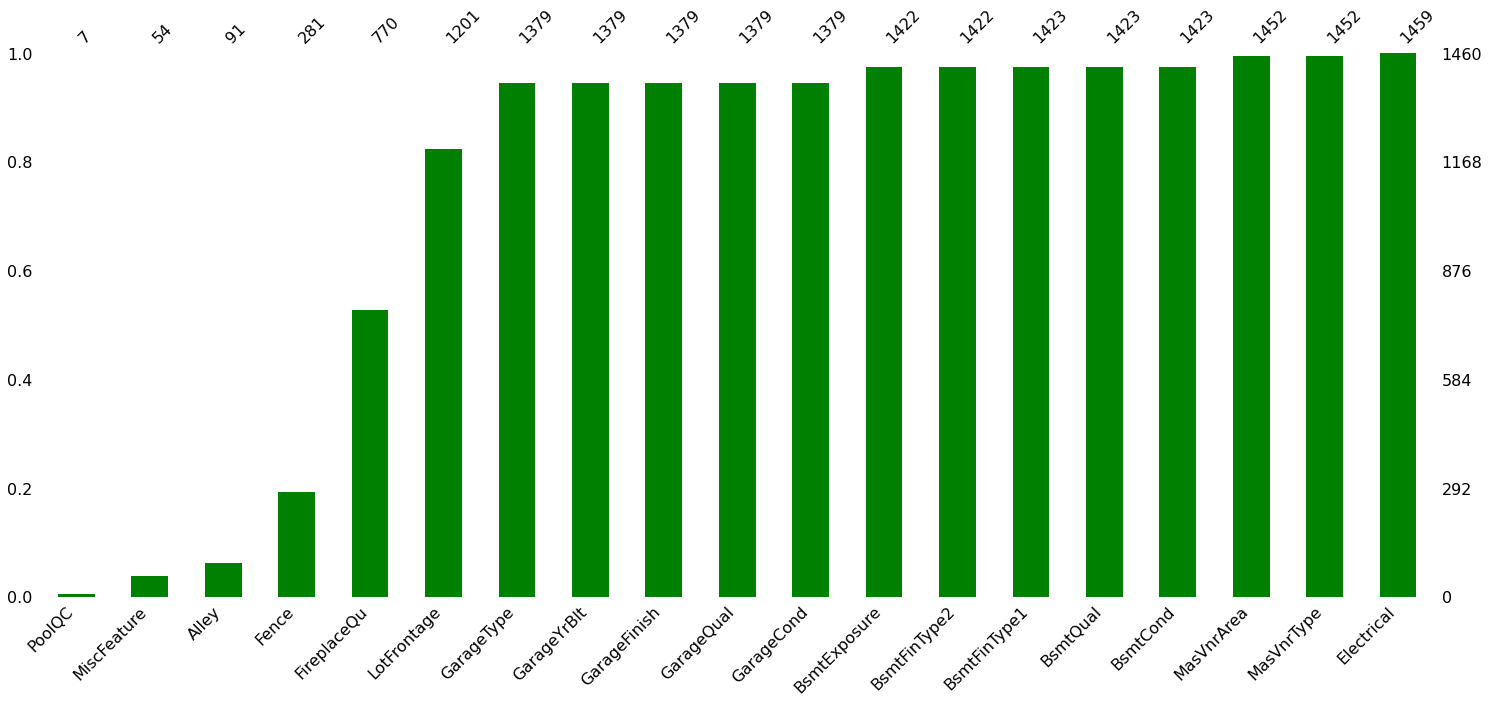

In [12]:
import missingno as mn
mn.bar(surpisehousing_df[surpisehousing_df.columns[surpisehousing_df.isna().any()]], sort="ascending", color='g')

##### iii. Null Values Check

In [13]:
# Get the total of NULL values and percentage of the columns
null_val_cnt = surpisehousing_df[surpisehousing_df.columns[surpisehousing_df.isna().any()]].isna().sum().sort_values(ascending=False)
null_val_percent = (surpisehousing_df[surpisehousing_df.columns[surpisehousing_df.isna().any()]].isna().sum() * 100 / surpisehousing_df.shape[0]).sort_values(ascending=False)

In [14]:
null_values = pd.concat([null_val_cnt, null_val_percent], axis=1, keys=['Count', 'Percentage'])
null_values

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [15]:
null_values[ null_values['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], dtype='object')

In [16]:
# Dropping these columns from the dataframe `surpisehousing_df`
surpisehousing_df.drop(columns=null_values[ null_values['Percentage'] > 15].index, inplace=True)

In [17]:
# Checking the surpisehousing_df Shape
surpisehousing_df.shape

(1460, 75)

In [18]:
null_values = null_values[null_values['Percentage'] < 15]
null_values

,Count,Percentage
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


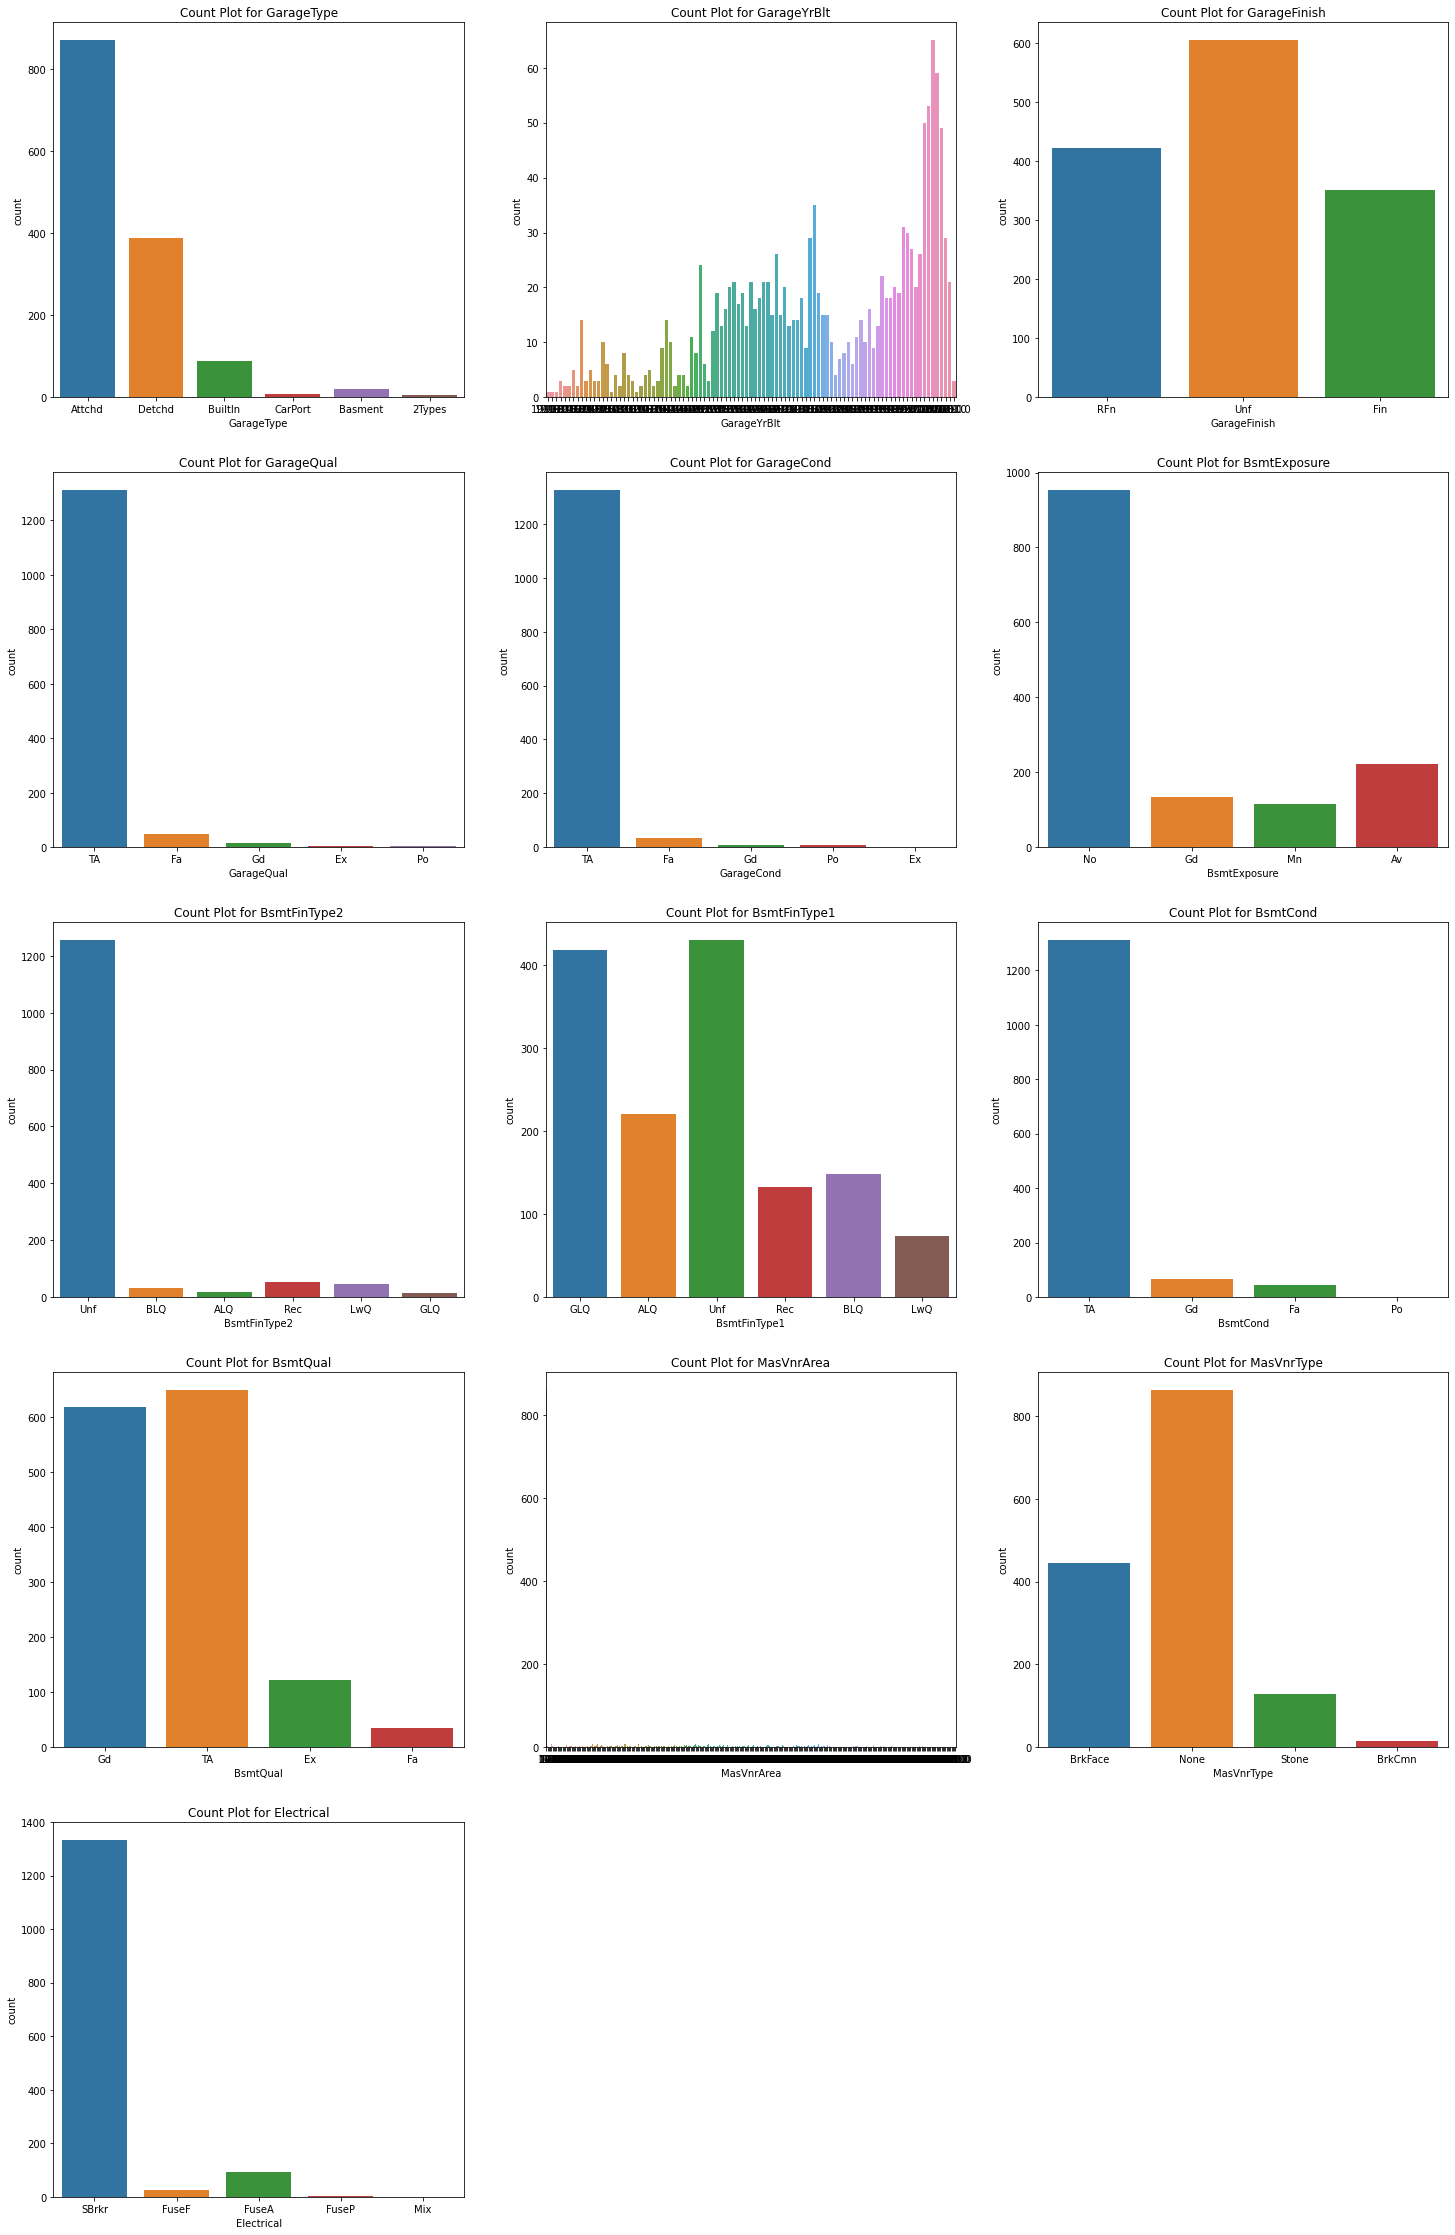

In [19]:
plt.figure(figsize=[25, 40])

for i, var in enumerate(null_values.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(surpisehousing_df[var])
    plt.title(f"Count Plot for {var}")

From the above Plot Observed that
For these features, we will perform imputation using the below approach:
If the feature is numerical, we'll use median() to replace the missing values
If the feature is categorical, we'll use mode() to replace the missing values
If the feature value NA has a meaningful value (For e.g. GarageType = NA refers to "No Garage"). We'll replace these values with None

In [20]:
# Impute "GarageType" with 'None' as it has a meaningful value
surpisehousing_df['GarageType'].fillna('None', inplace=True)
# Impute "GarageFinish" with 'None' as it has a meaningful value
surpisehousing_df['GarageFinish'].fillna('None', inplace=True)
# Impute "GarageQual" with 'None' as it has a meaningful value
surpisehousing_df['GarageQual'].fillna('None', inplace=True)
# Impute "GarageQual" with 'None' as it has a meaningful value
surpisehousing_df['GarageCond'].fillna('None', inplace=True)
# Impute "BsmtExposure" with 'None' as it has a meaningful value
surpisehousing_df['BsmtExposure'].fillna('None', inplace=True)
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
surpisehousing_df['BsmtFinType2'].fillna('None', inplace=True)
# Impute "BsmtFinType1" with 'None' as it has a meaningful value
surpisehousing_df['BsmtFinType1'].fillna('None', inplace=True)
# Impute "BsmtCond" with 'None' as it has a meaningful value
surpisehousing_df['BsmtCond'].fillna('None', inplace=True)
# Impute "BsmtQual" with 'None' as it has a meaningful value
surpisehousing_df['BsmtQual'].fillna('None', inplace=True)

# Impute "GarageYrBlt" with Median value
surpisehousing_df['GarageYrBlt'].fillna(surpisehousing_df['GarageYrBlt'].median(), inplace=True)
# Impute "MasVnrArea" with Median value
surpisehousing_df['MasVnrArea'].fillna(surpisehousing_df['MasVnrArea'].median(), inplace=True)

# Impute "MasVnrType" with Mode value
surpisehousing_df['MasVnrType'].fillna(surpisehousing_df['MasVnrType'].mode()[0], inplace=True)
# Impute "Electrical" with Mode value
val = surpisehousing_df['Electrical'].mode()[0]
surpisehousing_df['Electrical'].fillna(val, inplace=True)

In [21]:
null_val_cnt = surpisehousing_df[surpisehousing_df.columns[surpisehousing_df.isna().any()]].isna().sum().sort_values(ascending=False)
null_val_percent = (surpisehousing_df[surpisehousing_df.columns[surpisehousing_df.isna().any()]].isna().sum() * 100 / surpisehousing_df.shape[0]).sort_values(ascending=False)
null_values = pd.concat([null_val_cnt, null_val_percent], axis=1, keys=['Count', 'Percentage'])
null_values

,Count,Percentage


We will drop the unimportant features by observing the count plot graph

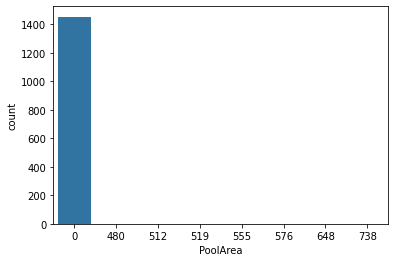

In [22]:
# Drop the "PoolArea" feature as most of the values are assigned to "0"
sns.countplot(surpisehousing_df['PoolArea'])
surpisehousing_df.drop(columns='PoolArea', inplace=True)

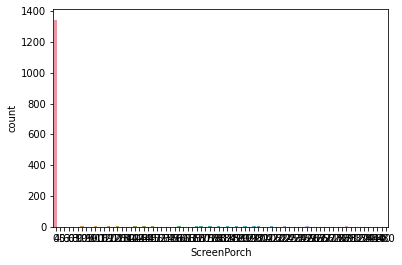

In [23]:
# Drop the "ScreenPorch" feature as most of the values are assigned to "0"
sns.countplot(surpisehousing_df['ScreenPorch'])
surpisehousing_df.drop(columns='ScreenPorch', inplace=True)

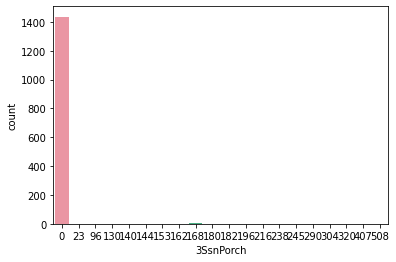

In [24]:
# Drop the "3SsnPorch" feature as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(surpisehousing_df['3SsnPorch'])
surpisehousing_df.drop(columns='3SsnPorch', inplace=True)

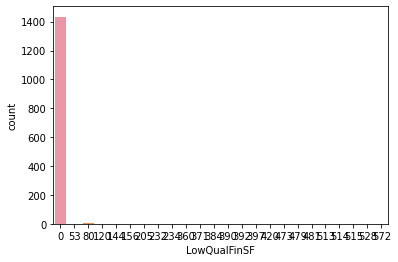

In [25]:
# Drop the "LowQualFinSF" feature as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(surpisehousing_df['LowQualFinSF'])
surpisehousing_df.drop(columns='LowQualFinSF', inplace=True)

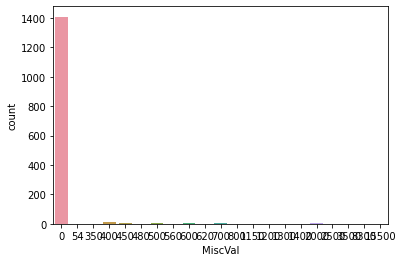

In [26]:
# Drop the  "MiscVal" feature as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(surpisehousing_df['MiscVal'])
surpisehousing_df.drop(columns='MiscVal', inplace=True)

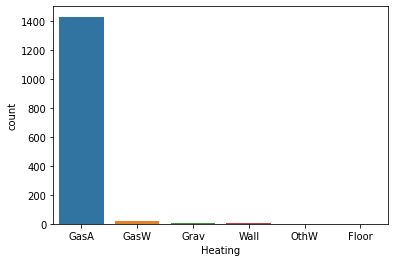

In [27]:
# Drop the "Heating" feature as it doesn't contain much variance. Most values are assigned to "GasA"
sns.countplot(surpisehousing_df['Heating'])
surpisehousing_df.drop(columns='Heating', inplace=True)

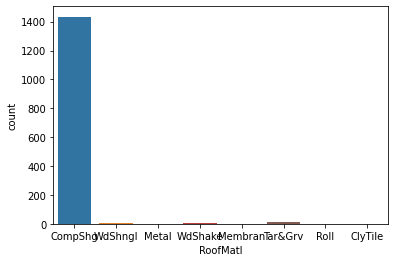

In [28]:
# Drop the "RoofMatl" feature as it doesn't contain much variance. Most values are assigned to "CompShg"
sns.countplot(surpisehousing_df['RoofMatl'])
surpisehousing_df.drop(columns='RoofMatl', inplace=True)

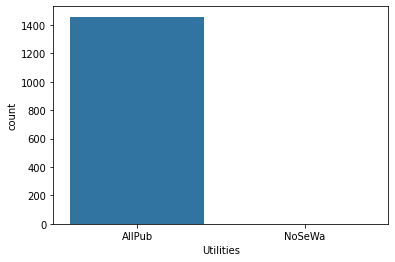

In [29]:
#Drop the "Utilities" feature as it doesn't contain much variance. Most values are assigned to "AllPub"
sns.countplot(surpisehousing_df['Utilities'])
surpisehousing_df.drop(columns='Utilities', inplace=True)

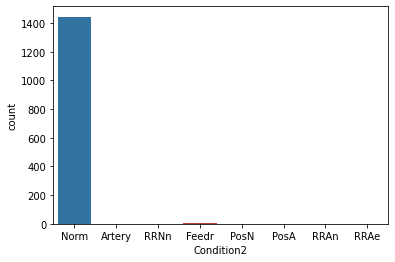

In [30]:
# Drop the "Condition2" feature as it doesn't contain much variance. Most values are assigned to "Norm"
sns.countplot(surpisehousing_df['Condition2'])
surpisehousing_df.drop(columns='Condition2', inplace=True)

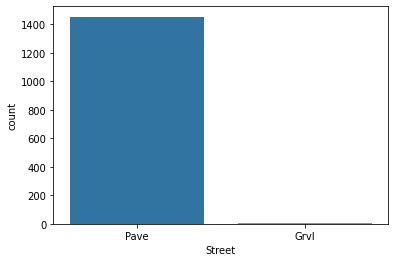

In [31]:
# Drop the "Street" as it doesn't contain much variance. Most values are assigned to "Pave"
sns.countplot(surpisehousing_df['Street'])
surpisehousing_df.drop(columns='Street', inplace=True)

In [32]:
# Drop the "Id" columns as it's not important
surpisehousing_df.drop(columns='Id', inplace=True)

In [33]:
surpisehousing_df.shape

(1460, 64)

In the dataframe there are 4 year columns. Using this, we'll create the Age columns that track the time in year and remove these columns.
Age will be calculated by subtracting the Year from the current Year for each column.

In [34]:
current_year = 2022

In [35]:
surpisehousing_df['Age_GarageYrBlt_Years'] = current_year - surpisehousing_df['GarageYrBlt']
surpisehousing_df['Age_YrSold_Years'] = current_year - surpisehousing_df['YrSold']
surpisehousing_df['Age_Built_Years'] = current_year - surpisehousing_df['YearBuilt']
surpisehousing_df['Age_RemodAdd_Years'] = current_year - surpisehousing_df['YearRemodAdd']

In [36]:
surpisehousing_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)

In [37]:
surpisehousing_df.shape

(1460, 64)

Check the dataframe

In [38]:
surpisehousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   MSZoning               1460 non-null   object 
 2   LotArea                1460 non-null   int64  
 3   LotShape               1460 non-null   object 
 4   LandContour            1460 non-null   object 
 5   LotConfig              1460 non-null   object 
 6   LandSlope              1460 non-null   object 
 7   Neighborhood           1460 non-null   object 
 8   Condition1             1460 non-null   object 
 9   BldgType               1460 non-null   object 
 10  HouseStyle             1460 non-null   object 
 11  OverallQual            1460 non-null   int64  
 12  OverallCond            1460 non-null   int64  
 13  RoofStyle              1460 non-null   object 
 14  Exterior1st            1460 non-null   object 
 15  Exte

#####iv. Get Numerical Values


In [39]:
# Getting numerical variables
numerical_var = surpisehousing_df.select_dtypes(exclude='object').columns
numerical_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years', 'Age_Built_Years', 'Age_RemodAdd_Years'], dtype='object')

#### V. Get Categorical Variables

In [40]:
# Getting categorical variables
categorical_var = surpisehousing_df.select_dtypes(include='object').columns
categorical_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

Checking the distribution on the target variable SalePrice

<Figure size 1440x1080 with 0 Axes>

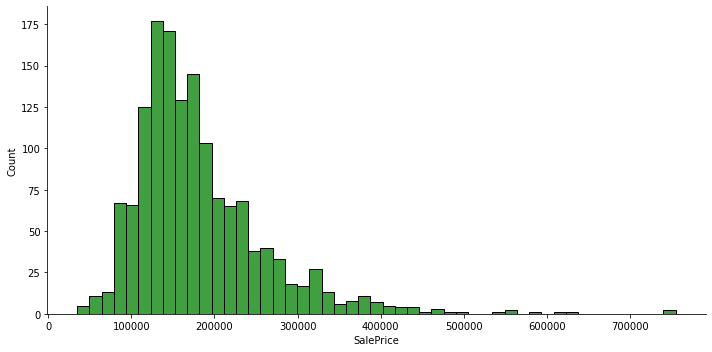

In [41]:
plt.figure(figsize=[20,15])
sns.displot(surpisehousing_df['SalePrice'], color="g", aspect=2)
plt.show()

In [42]:
surpisehousing_df['SalePrice'].skew()

1.8828757597682129

In [43]:
surpisehousing_df['SalePrice'].kurtosis()

6.536281860064529

<Figure size 1440x1080 with 0 Axes>

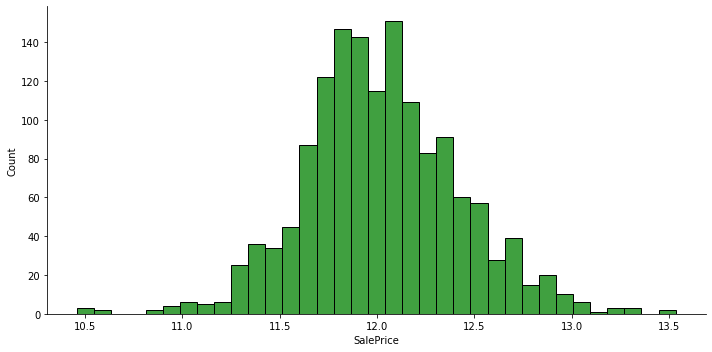

In [44]:
# Plot the distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(surpisehousing_df['SalePrice']), color="g", aspect=2)
plt.show()

In [45]:
# Create the Log Transformed "SalePrice" column
surpisehousing_df['Transformed_SalePrice'] = np.log(surpisehousing_df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

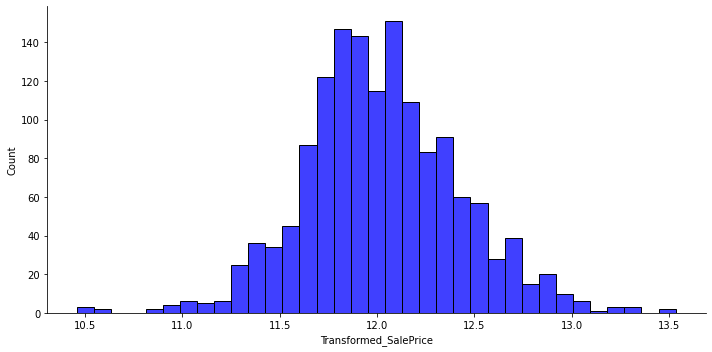

In [46]:
# DisPlot the distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(surpisehousing_df['Transformed_SalePrice'], color="b", aspect=2)
plt.show()

In [47]:
surpisehousing_df.shape

(1460, 65)

### Step 2: EDA & Visualizing the data


In [48]:
from scipy.stats import norm

#####i. Visualization of Target Variable SalePrice

Text(0.5, 0, '')

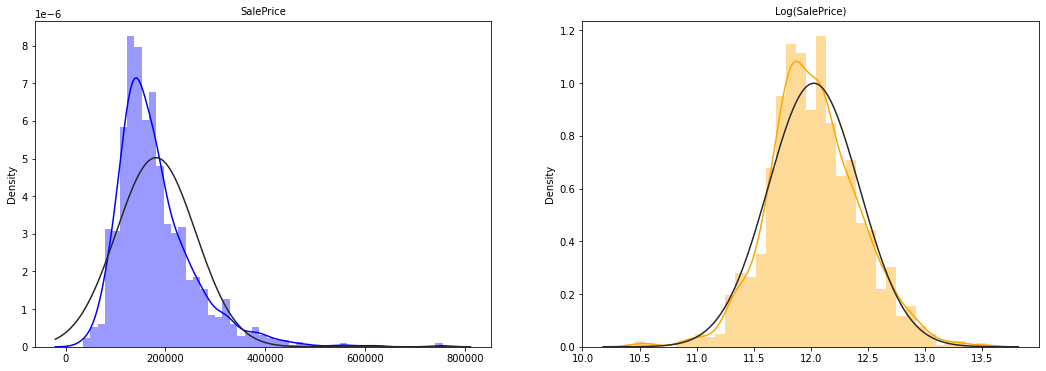

In [53]:
#Visualization of target variable Sales Price
plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
sns.distplot(surpisehousing_df['SalePrice'], color="blue", fit = norm)
plt.title('SalePrice', fontsize = 10)
plt.xlabel('')

#Visualization of log(Target) Sales Price

plt.subplot(1,2,2)
sns.distplot(np.log(surpisehousing_df['SalePrice']), color="orange", fit = norm)
plt.title('Log(SalePrice)', fontsize = 10)
plt.xlabel('')

#####ii. Visualization of Categorical columns

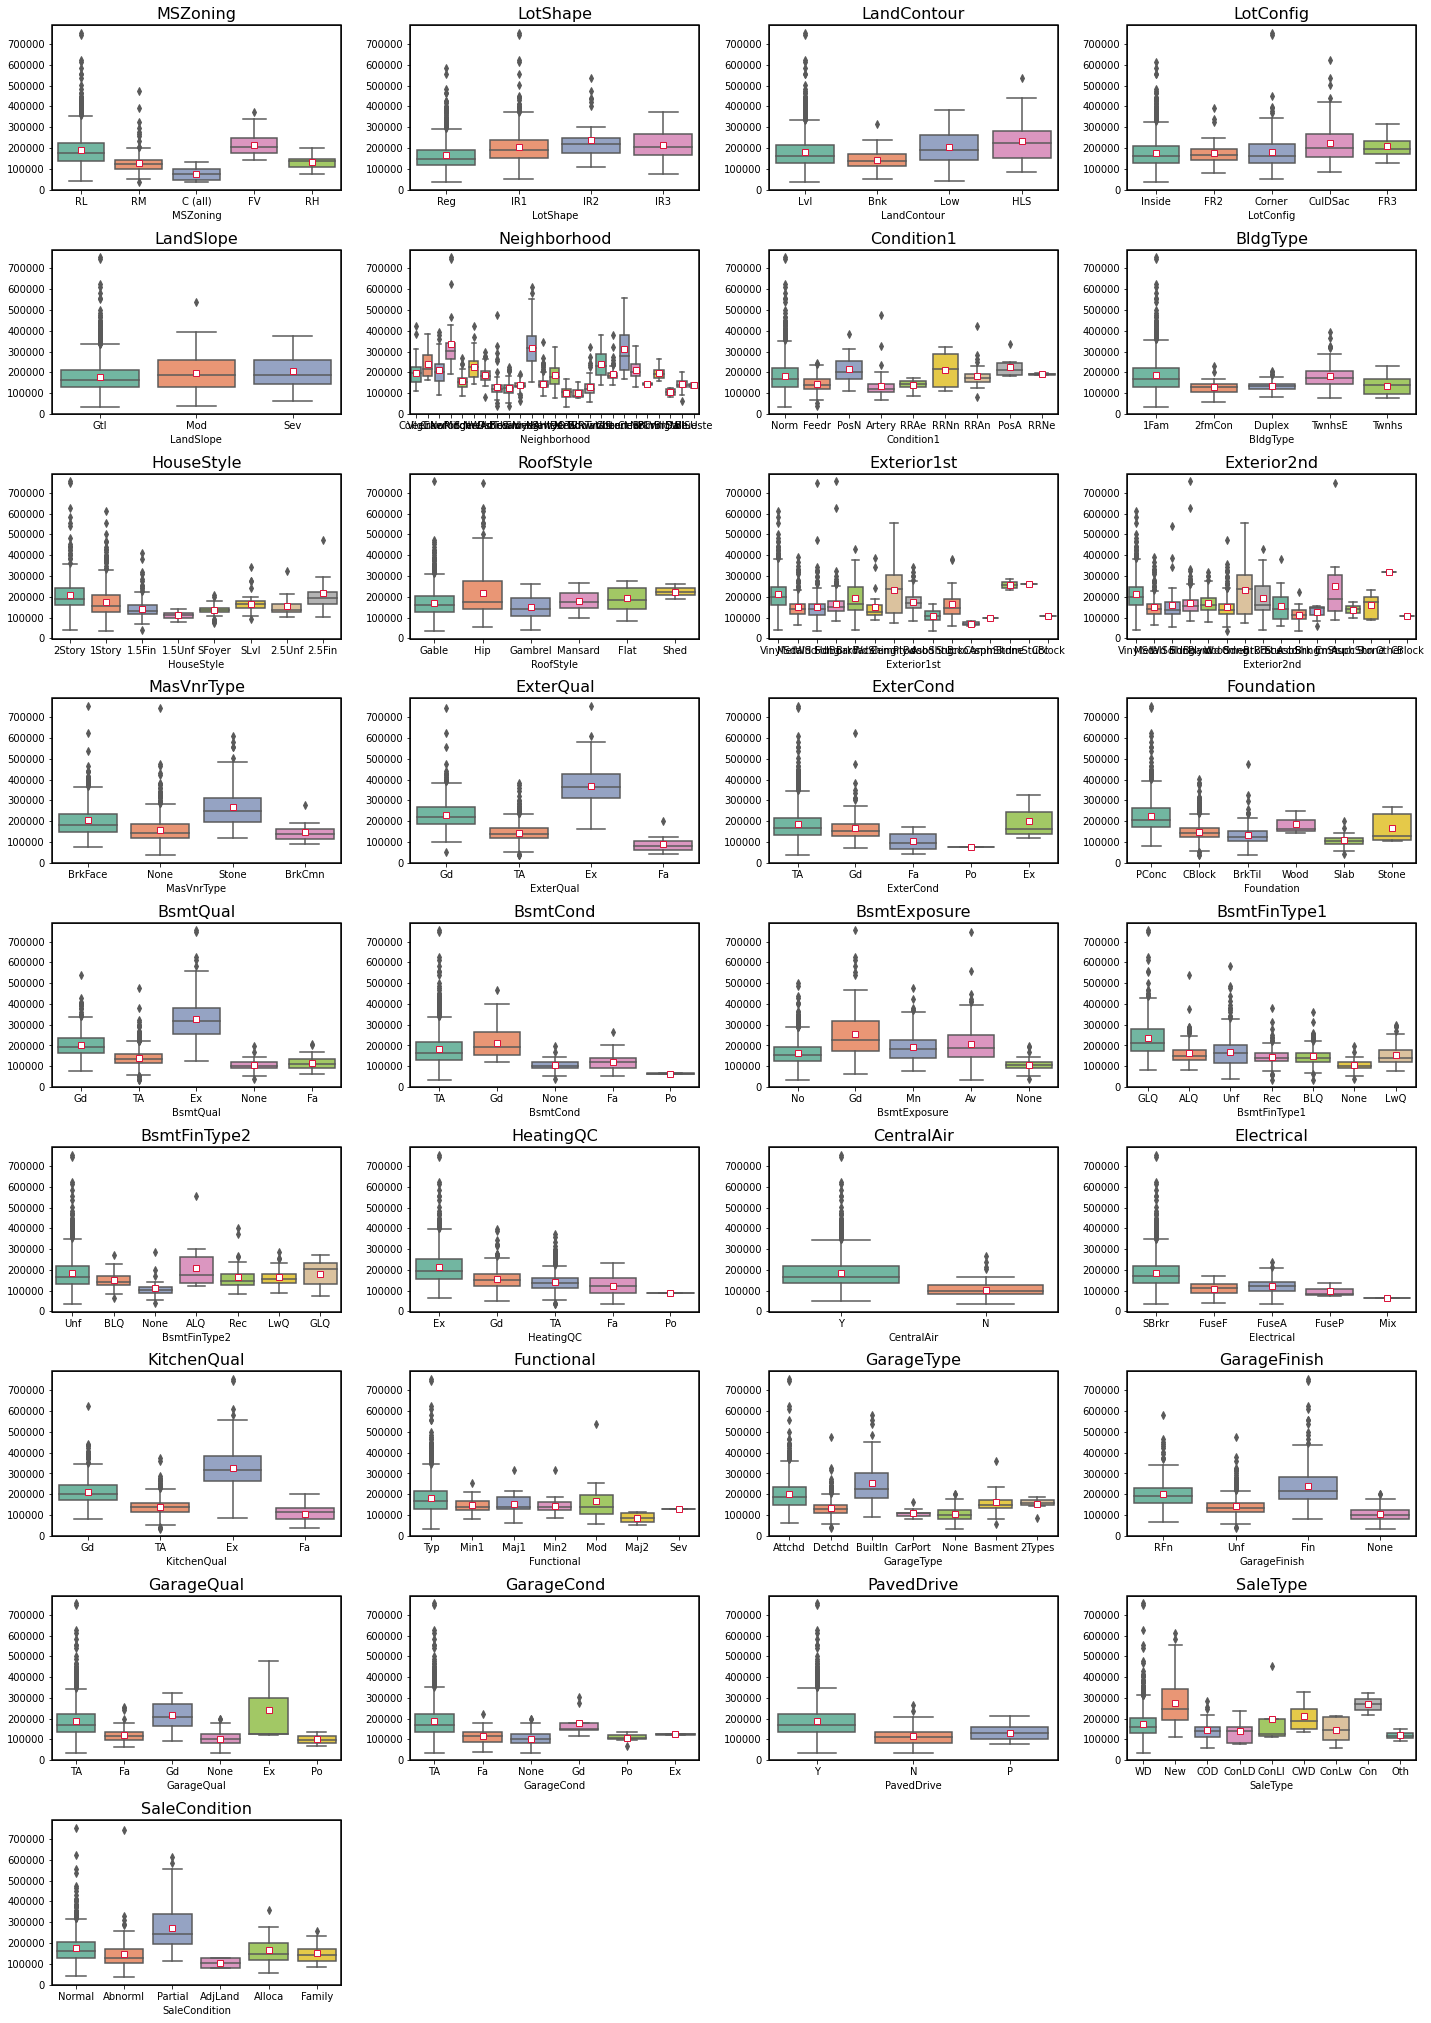

In [54]:
#visualizing catagorical variables w.r.t target variable

def box_plt(x, y):
    ax = sns.boxplot(x = surpisehousing_df[x], y =surpisehousing_df[y], palette = 'Set2', showmeans = True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    plt.title('{}'.format(x), fontsize = 16)

cat_cols = surpisehousing_df.select_dtypes(exclude = np.number).columns

plt.figure(figsize = [20,34])
for i in range(len(cat_cols)):
    plt.subplot(11,4, i+1)
    box_plt(cat_cols[i], 'SalePrice')
plt.tight_layout()
plt.show()

##### iii.Checking the correlation of the variables


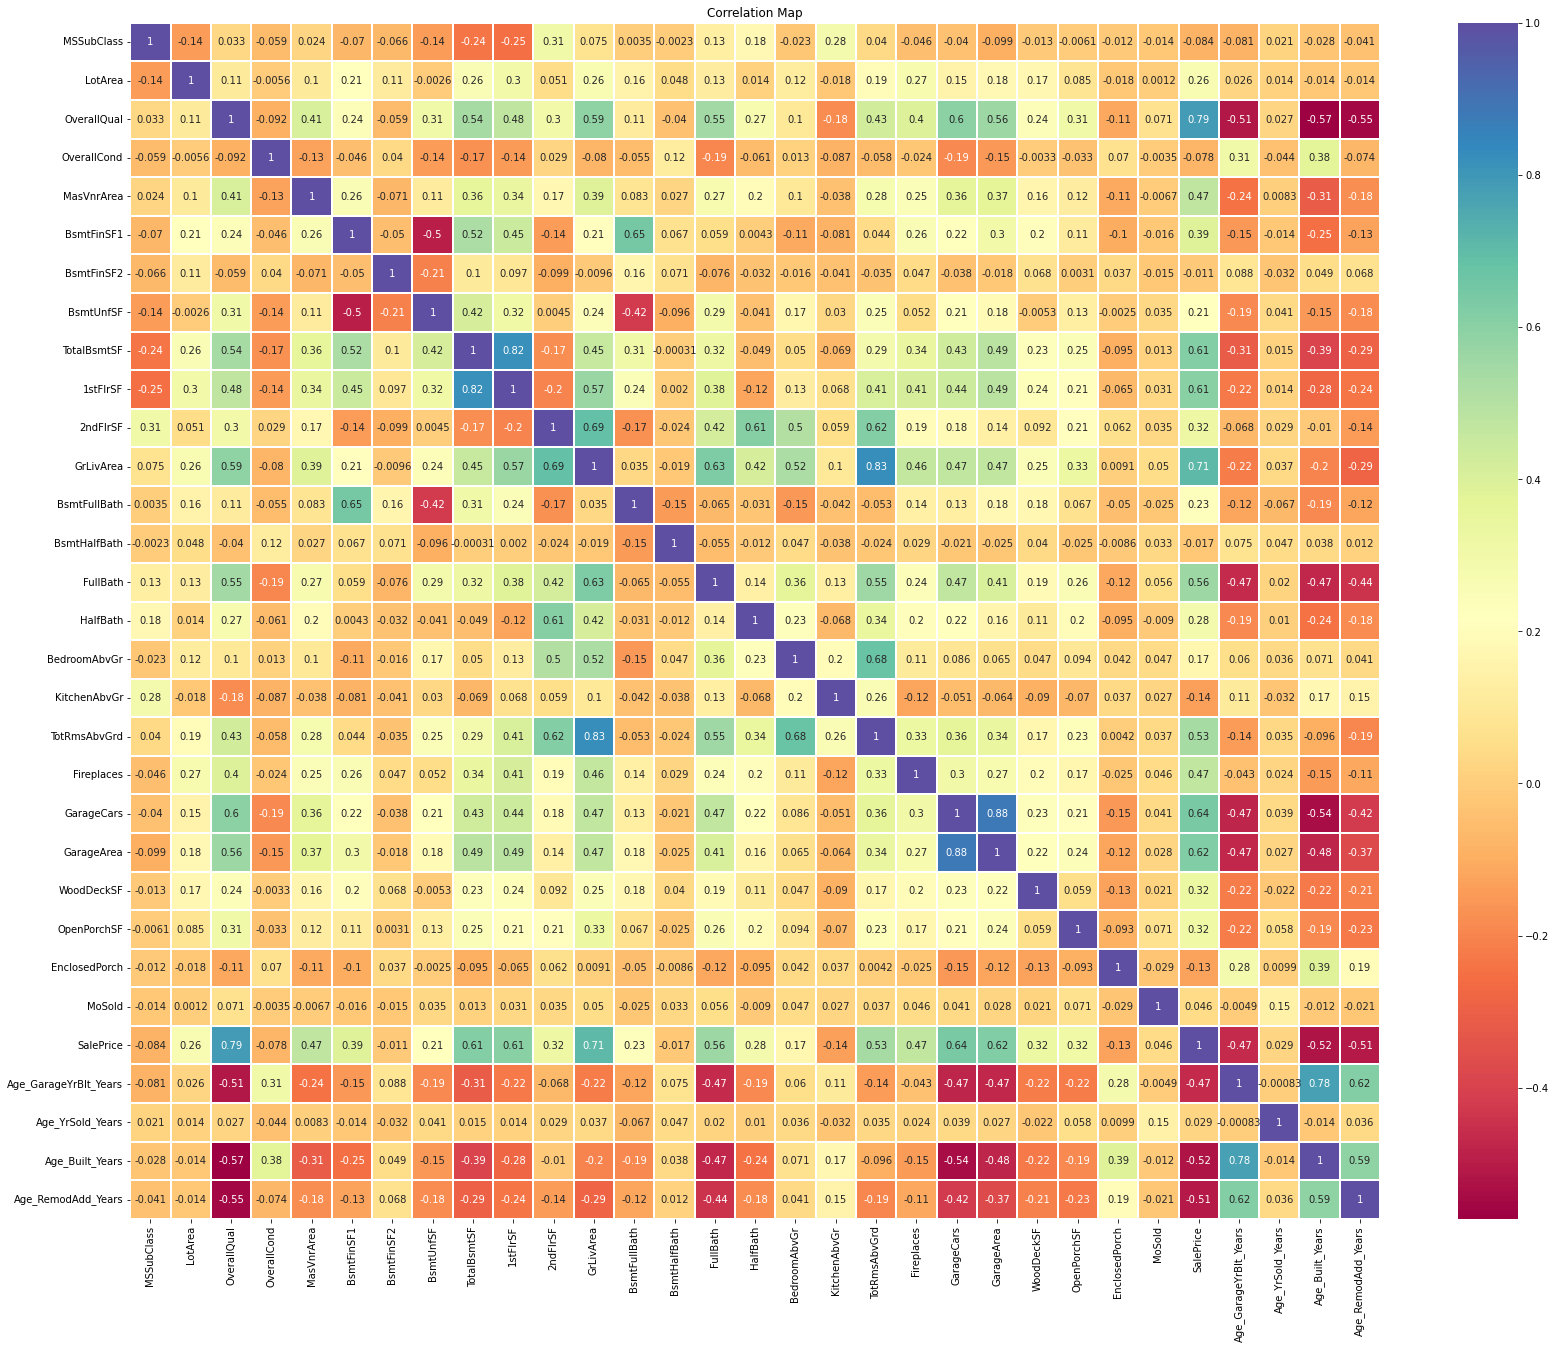

In [55]:
# Checking the correlation of the variables 
plt.figure(figsize = (28,22))
corr = surpisehousing_df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
ax= sns.heatmap(corr, annot = True, cmap="Spectral",linewidth =1)
plt.title("Correlation Map")
plt.show()

#####iv.From the list, we'll pick the top 10 most correlated variables with SalePrice

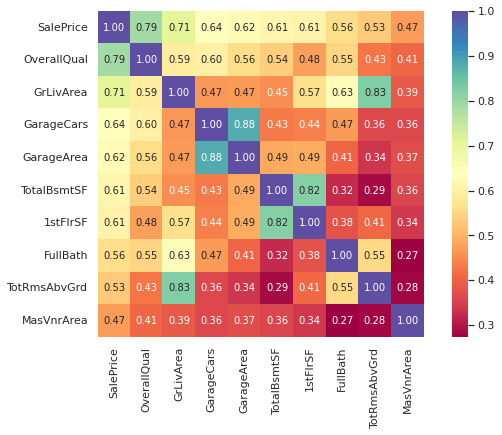

In [56]:
plt.figure(figsize=[10,6])
k = 10 # no. of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(surpisehousing_df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='Spectral')
plt.show()

##Step 3: Data Preparation

####i. Get the lenght of categorical variables

In [57]:
# Getting categorical variables
categorical_var = surpisehousing_df.select_dtypes(include='object').columns
print(len(categorical_var))

33


####ii.One Hot Encoding

In [58]:
categorical_df = surpisehousing_df.select_dtypes(include='object')
categorical_df.columns.shape

(33,)

In [59]:
# One Hot Encoding on categorical columns
df_dummies = pd.get_dummies(categorical_df, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

####iii. Dropping original categorical columns


In [60]:
surpisehousing_df.drop(list(categorical_df.columns), axis=1, inplace=True)
surpisehousing_df.shape

(1460, 32)

#### iv. Merge the original surpirse housing dataframe and dummies dataframe

In [61]:
surpisehousing_df = pd.concat([surpisehousing_df, df_dummies], axis=1)
surpisehousing_df.shape

(1460, 216)

#### v. Divide the surprise housing data into X and y for building the model

In [62]:
X = surpisehousing_df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = surpisehousing_df['Transformed_SalePrice']

In [63]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Age_GarageYrBlt_Years,Age_YrSold_Years,Age_Built_Years,Age_RemodAdd_Years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,19.0,14,19,19,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,5

In [64]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

## Step 4: Splitting the surpirse housing data into Train & Test Dataset


In [65]:
# Import library from sklearn from train, test & split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1022, 214)
(1022,)


In [66]:
print(X_test.shape)
print(y_test.shape)

(438, 214)
(438,)


In [67]:
surpisehousing_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 216 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotArea                1460 non-null   int64  
 2    OverallQual            1460 non-null   int64  
 3    OverallCond            1460 non-null   int64  
 4    MasVnrArea             1460 non-null   float64
 5    BsmtFinSF1             1460 non-null   int64  
 6    BsmtFinSF2             1460 non-null   int64  
 7    BsmtUnfSF              1460 non-null   int64  
 8    TotalBsmtSF            1460 non-null   int64  
 9    1stFlrSF               1460 non-null   int64  
 10   2ndFlrSF               1460 non-null   int64  
 11   GrLivArea              1460 non-null   int64  
 12   BsmtFullBath           1460 non-null   int64  
 13   BsmtHalfBath           1460 non-null   int64  
 14   FullBath               1460 non-null  

## Step 5: Scaling using MinMaxScalar

In [68]:
# Getting numerical variables
numerical_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(numerical_var))
numerical_var

30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years', 'Age_Built_Years', 'Age_RemodAdd_Years'], dtype='object')

In [70]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[numerical_var] = sc.fit_transform(X_train[numerical_var])

# Perform only transform on the test dataset
X_test[numerical_var] = sc.transform(X_test[numerical_var])

In [71]:
print(X_train.shape)
print(X_test.shape)

(1022, 214)
(438, 214)


## Step6: Model Building and Evalution


###i. Linear Regression

In [72]:
# Linear Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
# Check the co-efficients for all the features
coeff = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-3.843928e-02
LotArea,2.337459e-01
OverallQual,4.508729e-01
OverallCond,2.381196e-01
MasVnrArea,-6.273072e-02
BsmtFinSF1,-8.542238e+10
BsmtFinSF2,-1.705723e+10
BsmtUnfSF,-3.535554e+10
TotalBsmtSF,9.247532e+10
1stFlrSF,-9.024840e-01


In [74]:
# Checking the Intercept
linear_reg.intercept_

10.63726786048113

In [75]:
# Making the predictions on test data using the model
y_pred = linear_reg.predict(X_test)

In [76]:
# Showing the actual and predicted values
sh_df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sh_df_result

,Actual,Predicted
892,11.947949,1.192586e+01
1105,12.691580,1.275214e+01
413,11.652687,1.153475e+01
522,11.976659,1.212221e+01
1036,12.661914,1.273882e+01
614,11.231888,1.126007e+01
218,12.649155,1.253451e+01
1160,11.891362,1.185731e+01
649,11.344507,1.121762e+01
887,11.816727,1.176397e+01


In [78]:
X_train.shape

(1022, 214)

In [79]:
X_test.shape

(438, 214)

#####Display the Train & Test data R2,RSS and MSE scores

In [80]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9224312551751679
Test r2 score is : -2.823694412593627e+18
Train RSS score is : 12.288112552841088
Test RSS score is : 2.098146705563939e+20
Train MSE score is : 0.012023593495930615
Test MSE score is : 4.7902892821094496e+17


From above scores observed that the train score is good, but test score is really underwhelming. This is the same for Mean Squared Error as well. This means that the model is overfitting.

Method
As seen the columns are high, we will use RFE (Recursive Feature Elimination) to select 50 columns first and remove the columns with high VIF

#####Model 1: Build the model using RFE

In [81]:
# Import RFE from library
from sklearn.feature_selection import RFE

In [82]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=214)

In [83]:
# Instantiate a LinearRegression object
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,n_features_to_select=50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [84]:
# Check the list of selections and ranking of each variable by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 50),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 95),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 39),
 ('2ndFlrSF', False, 98),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 53),
 ('FullBath', False, 19),
 ('HalfBath', False, 31),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 140),
 ('WoodDeckSF', False, 44),
 ('OpenPorchSF', False, 129),
 ('EnclosedPorch', False, 6),
 ('MoSold', False, 79),
 ('Age_GarageYrBlt_Years', False, 67),
 ('Age_YrSold_Years', False, 153),
 ('Age_Built_Years', True, 1),
 ('Age_RemodAdd_Years', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 124),
 ('LotShape_IR3', Tru

In [85]:
# Check the 50 variables selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'Age_Built_Years', 'Age_RemodAdd_Years', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'BldgType_Twnhs', 'RoofStyle_Gable', 'Exterior1st_BrkFace', 'Exterior2nd_Brk Cmn', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtExposure_None', 'BsmtFinType1_None', 'BsmtFinType2_None', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'GarageType_None', 'GarageFinish_None', 'GarageQual_None', 'GarageCond_None', 'SaleType_Oth', 'SaleCondition_Alloca'], dtype='object')

In [86]:
# Check the variables which were NOT selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=164)

##### Build the Model with 50 features

In [87]:
# Creating a dataframe "X_train_rfe" with variables selected by RFE
X_train_rfe = X_train[cols]

In [88]:
X_train_rfe.shape

(1022, 50)

In [89]:
# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [91]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.886
Model:                               OLS   Adj. R-squared:                  0.881
Method:                    Least Squares   F-statistic:                     181.8
Date:                   Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                           16:46:02   Log-Likelihood:                 613.76
No. Observations:                   1022   AIC:                            -1142.
Df Residuals:                        979   BIC:                            -929.6
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [92]:
HighVIF = checkVIF(X_train_new)

In [93]:
HighVIF[ HighVIF['VIF'] >=5 ]

,Features,VIF
46,GarageFinish_None,inf
45,GarageType_None,inf
47,GarageQual_None,inf
48,GarageCond_None,inf
4,BsmtFinSF1,inf
5,BsmtFinSF2,inf
6,BsmtUnfSF,inf
7,TotalBsmtSF,inf
41,BsmtFinType2_None,inf
40,BsmtFinType1_None,inf


In [95]:
highVIF_cols = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)
len(highVIF_cols)

20

In [96]:
highVIF_cols.remove('const')
len(highVIF_cols)

19

In [97]:
highVIF_cols

['GarageFinish_None',
 'GarageType_None',
 'GarageQual_None',
 'GarageCond_None',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFinType2_None',
 'BsmtFinType1_None',
 'BsmtExposure_None',
 'BsmtCond_None',
 'BsmtQual_None',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_FV',
 'BsmtQual_TA',
 'GrLivArea',
 'TotRmsAbvGrd']

In [98]:
X_train_rfe.shape

(1022, 50)

In [99]:
X_train_rfe.drop(highVIF_cols, axis=1, inplace=True)
X_train_rfe.shape

(1022, 31)

In [100]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,Age_Built_Years,Age_RemodAdd_Years,MSZoning_RH,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_Crawfor,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_StoneBr,BldgType_Twnhs,RoofStyle_Gable,Exterior1st_BrkFace,Exterior2nd_Brk Cmn,BsmtQual_Fa,BsmtQual_Gd,HeatingQC_Po,Functional_Maj2,Functional_Sev,SaleType_Oth,SaleCondition_Alloca
135,0.042534,0.666667,0.625,0.000000,0.375,0.5,0.333333,0.50,0.289855,0.666667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1452,0.011101,0.444444,0.500,0.333333,0.250,0.5,0.000000,0.50,0.036232,0.083333,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
762,0.034308,0.666667,0.500,0.000000,0.375,0.5,0.000000,0.50,0.007246,0.016667,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
932,0.048470,0.888889,0.500,0.000000,0.375,0.5,0.333333,0.75,0.028986,0.066667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,0.043782,0.666667,0.625,0.333333,0.375,0.5,0.333333,0.50,0.101449,0.233333,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### Build the model with 31 features

In [101]:
# 1. Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# 2. Create model
lr = sm.OLS(y_train,X_train_lm)

# 3. Fit the model
lm = lr.fit()

# 4. View the parameters
lm.params

const                   10.974359
LotArea                  0.673270
OverallQual              1.023741
OverallCond              0.223055
BsmtFullBath             0.210227
BedroomAbvGr             0.579957
KitchenAbvGr            -0.148790
Fireplaces               0.250853
GarageCars               0.485117
Age_Built_Years         -0.319464
Age_RemodAdd_Years      -0.157302
MSZoning_RH             -0.002293
LotShape_IR3            -0.222380
LandContour_HLS          0.079300
LandContour_Low          0.131018
LandContour_Lvl          0.060525
Neighborhood_Blueste    -0.211263
Neighborhood_Crawfor     0.144784
Neighborhood_NPkVill     0.119057
Neighborhood_NoRidge     0.149528
Neighborhood_StoneBr     0.172174
BldgType_Twnhs          -0.147813
RoofStyle_Gable         -0.022979
Exterior1st_BrkFace      0.144035
Exterior2nd_Brk Cmn     -0.201519
BsmtQual_Fa              0.037001
BsmtQual_Gd             -0.029431
HeatingQC_Po            -0.240409
Functional_Maj2         -0.285748
Functional_Sev

In [102]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.851
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     182.4
Date:                   Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                           16:48:55   Log-Likelihood:                 475.32
No. Observations:                   1022   AIC:                            -886.6
Df Residuals:                        990   BIC:                            -728.9
Df Model:                             31                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.9744      0.059    187.232      0.000      10.859      11.089
LotArea                  0.6733      0.111      6.089      0.000       0.456       0.890
OverallQual              1.0237      0.050     20.552      0.000       0.926       1.121
OverallCond              0.2231      0.042      5.277      0.000       0.140       0.306
BsmtFullBath             0.2102      0.030      7.042      0.000       0.152       0.269
BedroomAbvGr             0.5800      0.054     10.791      0.000       0.474       0.685
KitchenAbvGr            -0.1488      0.051     -2.946      0.003      -0.248      -0.050
Fireplaces               0.2509      0.026      9.482      0.000       0.199       0.303
GarageCars               0.4851      0.036     13.605      0.000       0.415       0.555
Age_Built_Years         -0.3195      0.039     -8.207      0.000      -0.396      -0.243
Age_RemodAdd_Years      -0.1573      0.020     -7.690      0.000      -0.197      -0.117
MSZoning_RH             -0.0023      0.044     -0.052      0.959      -0.089       0.085
LotShape_IR3            -0.2224      0.058     -3.828      0.000      -0.336      -0.108
LandContour_HLS          0.0793      0.039      2.032      0.042       0.003       0.156
LandContour_Low          0.1310      0.043      3.059      0.002       0.047       0.215
LandContour_Lvl          0.0605      0.026      2.307      0.021       0.009       0.112
Neighborhood_Blueste    -0.2113      0.155     -1.363      0.173      -0.516       0.093
Neighborhood_Crawfor     0.1448      0.029      5.057      0.000       0.089       0.201
Neighborhood_NPkVill     0.1191      0.086      1.391      0.165      -0.049       0.287
Neighborhood_NoRidge     0.1495      0.031      4.804      0.000       0.088       0.211
Neighborhood_StoneBr     0.1722      0.037      4.689      0.000       0.100       0.244
BldgType_Twnhs          -0.1478      0.030     -4.883      0.000      -0.207      -0.088
RoofStyle_Gable         -0.0230      0.012     -1.871      0.062      -0.047       0.001
Exterior1st_BrkFace      0.1440      0.028      5.196      0.000       0.090       0.198
Exterior2nd_Brk Cmn     -0.2015      0.086     -2.355      0.019      -0.369      -0.034
BsmtQual_Fa              0.0370      0.031      1.182      0.238      -0.024       0.098
BsmtQual_Gd             -0.0294      0.012     -2.367      0.018      -0.054      -0.005
HeatingQC_Po            -0.2404      0.155     -1.549      0.122      -0.545       0.064
Functional_Maj2         -0.2857      0.079     -3.629      0.000      -0.440      -0.131
Functional_Sev          -0.2559      0.155     -1.648      0.100      -0.561       0.049
SaleType_Oth             0.4003      0.159      2.523      0.012       0.089       0.712
SaleCondition_Alloca    

In [103]:
print(X_train_rfe.shape)
print(X_test.shape)

(1022, 31)
(438, 214)


In [104]:
names = X_train_rfe.columns
# We will create a new dataframe "X_test_new" by removing the columns dropped by the train data set
X_test_new = X_test[names]
X_test_new.shape

(438, 31)

In [105]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)
X_test_new.shape

(438, 32)

#### Final Model Linear Regression Evaluation

In [106]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8509937315854216
Test r2 score is : 0.8057900484119334
Train RSS score is : 23.60494296371585
Test RSS score is : 14.430774388860073
Train MSE score is : 0.023096813076042905
Test MSE score is : 0.032946973490548113


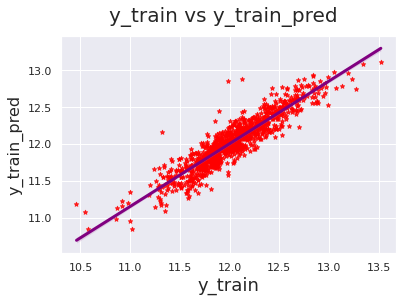

In [107]:
# Plot the graph b/w actual & predicted values with train data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'red',"s": 20}, line_kws = {"color": 'purple', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

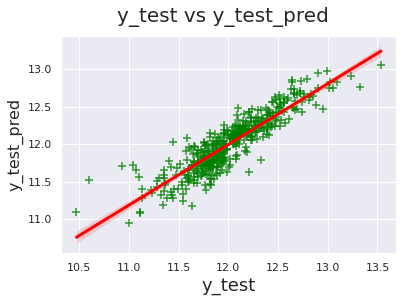

In [109]:
# Plot the graph b/w actual & predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'green',"s": 50}, line_kws = {"color": 'red', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

#### Residual analysis of Train data

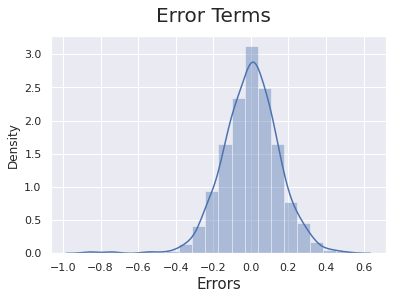

In [110]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

#### Residual Anlaysis of Test Data

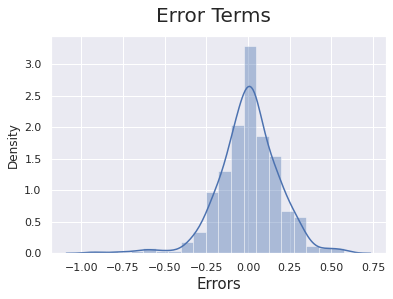

In [111]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

#### Linear Regression features and coefficients

In [112]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
LotArea,0.673270
OverallQual,1.023741
OverallCond,0.223055
BsmtFullBath,0.210227
BedroomAbvGr,0.579957
KitchenAbvGr,-0.148790
Fireplaces,0.250853
GarageCars,0.485117
Age_Built_Years,-0.319464
Age_RemodAdd_Years,-0.157302


#### Display the list of 31 features

In [113]:
# List of 31 features
names = X_train_rfe.columns
print(len(names))
print(list(names))

31
['LotArea', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'Age_Built_Years', 'Age_RemodAdd_Years', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'BldgType_Twnhs', 'RoofStyle_Gable', 'Exterior1st_BrkFace', 'Exterior2nd_Brk Cmn', 'BsmtQual_Fa', 'BsmtQual_Gd', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'SaleType_Oth', 'SaleCondition_Alloca']


### ii. Ridge Regression


In [114]:
# Import required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [115]:
# Get only 31 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]
print(X_train.shape)
print(X_test.shape)

(1022, 31)
(438, 31)


In [116]:
# list of alpha values to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
# Applying lasso regression with 5 fold cross validation

ridge_reg = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge_reg,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004189,0.001269,0.002521,0.000183,0.0001,{'alpha': 0.0001},-0.113110,-0.128332,-0.126350,-0.122765,-0.110603,-0.120232,0.007112,8,-0.116510,-0.111832,-0.112996,-0.113921,-0.116554,-0.114362,0.001891
1,0.003542,0.000209,0.002176,0.000103,0.001,{'alpha': 0.001},-0.113111,-0.128330,-0.126348,-0.122764,-0.110604,-0.120232,0.007110,7,-0.116510,-0.111833,-0.112997,-0.113923,-0.116555,-0.114364,0.001891
2,0.003401,0.000165,0.002182,0.000110,0.01,{'alpha': 0.01},-0.113126,-0.128305,-0.126331,-0.122761,-0.110618,-0.120228,0.007095,6,-0.116519,-0.111848,-0.113011,-0.113936,-0.116567,-0.114376,0.001889
3,0.003387,0.000086,0.002326,0.000108,0.05,{'alpha': 0.05},-0.113187,-0.128199,-0.126258,-0.122750,-0.110680,-0.120215,0.007028,5,-0.116559,-0.111912,-0.113086,-0.113997,-0.116618,-0.114435,0.001879
4,0.006670,0.006153,0.002403,0.000218,0.1,{'alpha': 0.1},-0.113259,-0.128085,-0.126180,-0.122740,-0.110756,-0.120204,0.006953,4,-0.116612,-0.111988,-0.113183,-0.114071,-0.116687,-0.114508,0.001869


In [118]:
ridge_cv_results.shape

(28, 21)

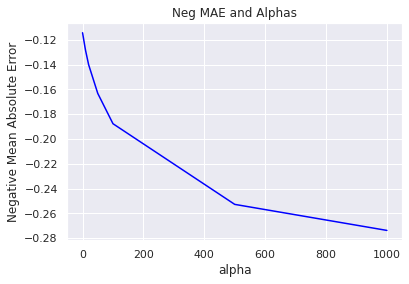

In [119]:
# Plot the train scores with alpha

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

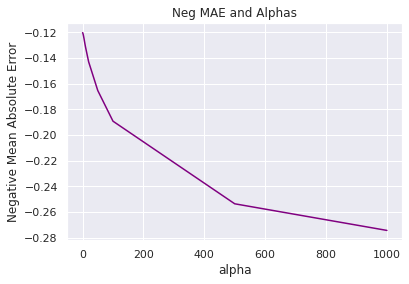

In [120]:
# Plot the testing scores with alpha
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], color='purple')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

#### Getting the Best Value

In [121]:
optimalvalue_ridge = ridge_model_cv.best_params_['alpha']
optimalvalue_ridge

0.2

#### Build the Ridge Model

In [122]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [123]:
ridge.coef_

array([ 0.61484243,  1.00996501,  0.22053727,  0.2122581 ,  0.57389722,
       -0.14187474,  0.25605049,  0.4858994 , -0.31840495, -0.16000981,
       -0.00369807, -0.20901717,  0.07953049,  0.13247688,  0.05812323,
       -0.17888886,  0.14354854,  0.10470631,  0.15055595,  0.17114896,
       -0.14832854, -0.02367675,  0.14422353, -0.18729174,  0.03452816,
       -0.02845542, -0.20047606, -0.27366222, -0.21249394,  0.32798413,
        0.11540279])

#### Ridge Features and Coefficients

In [124]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
LotArea,0.614842
OverallQual,1.009965
OverallCond,0.220537
BsmtFullBath,0.212258
BedroomAbvGr,0.573897
KitchenAbvGr,-0.141875
Fireplaces,0.256050
GarageCars,0.485899
Age_Built_Years,-0.318405
Age_RemodAdd_Years,-0.160010


#### Ridge Regression Model Evaluation

In [125]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8508543367308322
Test r2 score is : 0.8074323928602678
Train RSS score is : 23.627025307143597
Test RSS score is : 14.308739951340716
Train MSE score is : 0.023118420065698236
Test MSE score is : 0.032668356053289306


###iii.Lasso Regression

In [126]:
# Import the required libaries for Ridge, Lasso and GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [127]:
# Get only 31 features for both X_train and X_test
X_train = X_train[names]
X_test = X_test[names]
print(X_train.shape)
print(X_test.shape)

(1022, 31)
(438, 31)


In [128]:
# List of alpha values to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
# Applying lasso regression with 5 fold cross validation

lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021934,0.005637,0.007760,0.002780,0.0001,{'alpha': 0.0001},-0.113425,-0.127882,-0.125704,-0.122212,-0.110757,-0.119996,0.006756,1,-0.116767,-0.112200,-0.113488,-0.114278,-0.116837,-0.114714,0.001830
1,0.022340,0.009299,0.004507,0.001965,0.001,{'alpha': 0.001},-0.115431,-0.128692,-0.125066,-0.125188,-0.113337,-0.121543,0.006025,2,-0.119750,-0.115732,-0.118067,-0.118915,-0.120646,-0.118622,0.001680
2,0.014917,0.001293,0.005684,0.002266,0.01,{'alpha': 0.01},-0.144958,-0.154078,-0.167595,-0.154398,-0.134918,-0.151189,0.010875,3,-0.152534,-0.147368,-0.148324,-0.148783,-0.151524,-0.149707,0.001976
3,0.019821,0.004551,0.005702,0.003273,0.05,{'alpha': 0.05},-0.272883,-0.271106,-0.304363,-0.264130,-0.244838,-0.271464,0.019221,4,-0.270408,-0.271697,-0.265765,-0.271593,-0.275803,-0.271053,0.003214
4,0.018340,0.004202,0.005397,0.003633,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [130]:
lasso_cv_results.shape

(28, 21)

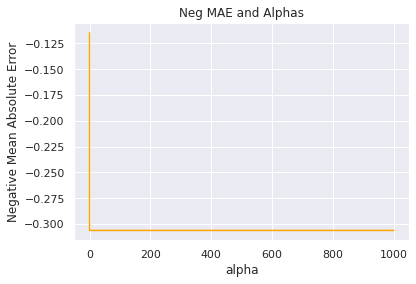

In [131]:
# Plot the train scores with alpha

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

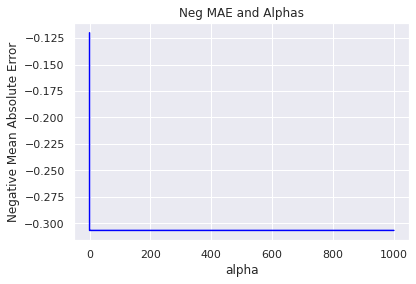

In [132]:
# Plotting testing scores with alpha
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], color='blue')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

#### Get the Best Value for alpha

In [134]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [135]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [136]:
lasso.coef_

array([ 0.62802586,  1.02514545,  0.21853995,  0.21325946,  0.57137485,
       -0.13010972,  0.25282534,  0.48324095, -0.31496677, -0.15850709,
       -0.        , -0.203284  ,  0.07042961,  0.12197425,  0.05175387,
       -0.111832  ,  0.14181957,  0.0660755 ,  0.14672097,  0.16603149,
       -0.14575735, -0.02281744,  0.14210565, -0.15018071,  0.02947422,
       -0.02719557, -0.13781454, -0.25967011, -0.15268709,  0.28577297,
        0.09777221])

#### Lasso features and their co-efficients

In [137]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.628026
OverallQual,1.025145
OverallCond,0.218540
BsmtFullBath,0.213259
BedroomAbvGr,0.571375
KitchenAbvGr,-0.130110
Fireplaces,0.252825
GarageCars,0.483241
Age_Built_Years,-0.314967
Age_RemodAdd_Years,-0.158507


#### Lasso Regression Model Evaluation

In [138]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8505275448145284
Test r2 score is : 0.8111346640271921
Train RSS score is : 23.67879430067273
Test RSS score is : 14.033642617247414
Train MSE score is : 0.023169074658192495
Test MSE score is : 0.03204027994805346


### iv. Compare the Linear, Ridge and Lasso Coefficients

In [139]:
compare_df = pd.DataFrame(index=X_train.columns)
compare_df.rows = X_train.columns

compare_df['Linear'] = lm.params
compare_df['Ridge'] = ridge.coef_
compare_df['Lasso'] = lasso.coef_
compare_df.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,1.023741,1.009965,1.025145
LotArea,0.673270,0.614842,0.628026
BedroomAbvGr,0.579957,0.573897,0.571375
GarageCars,0.485117,0.485899,0.483241
SaleType_Oth,0.400300,0.327984,0.285773
Fireplaces,0.250853,0.256050,0.252825
OverallCond,0.223055,0.220537,0.218540
BsmtFullBath,0.210227,0.212258,0.213259
Neighborhood_StoneBr,0.172174,0.171149,0.166031
Neighborhood_NoRidge,0.149528,0.150556,0.146721


Inference:

From above table observed that there are 31 significant features in the model
The co-efficients are very close for Ridge and Lasso Regression models post regularization with minimal variance to the model created by Linear Regression
The features are sorted in the order of decreasing significance of the co-efficients 
The resultant selection of significant feature order still remains the same

### v.Compare the metrics after Regularization

In [140]:
 #Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metrics = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.850994,0.850854,0.850528
1,R2 Score (Test),0.805790,0.807432,0.811135
2,RSS (Train),23.604943,23.627025,23.678794
3,RSS (Test),14.430774,14.308740,14.033643
4,MSE (Train),0.151976,0.152047,0.152214
5,MSE (Test),0.181513,0.180744,0.178998


Inference:
From the above table observed that 
i. The R2 Score, RSS and MSE are all very close for Linear Regression, Ridge and Lasso Regressions
ii. Lasso Regression has better scores by a very slight margin compared to Ridge Regression and Linear Regression

### vi.Double the Alpha Values

In [144]:
# Doubling Lasso and Ridge Regression's alpha values
optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 0.4 and Lasso is 0.0002


##### Build Ridge Regression 

In [145]:
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [154]:
ridge.coef_

array([ 0.56670791,  0.99669351,  0.21811558,  0.21331725,  0.5669429 ,
       -0.13612157,  0.26069558,  0.48690498, -0.31732393, -0.16252153,
       -0.00481047, -0.19748475,  0.07949617,  0.13298508,  0.0558578 ,
       -0.15560157,  0.14243291,  0.09286176,  0.15157552,  0.17016239,
       -0.14863395, -0.02439971,  0.14416569, -0.17547809,  0.03217985,
       -0.02755409, -0.17213497, -0.2626977 , -0.18181558,  0.27735682,
        0.11049742])

In [146]:
sh_df_ridge = pd.DataFrame(index=X_train.columns)
sh_df_ridge.rows = X_train.columns
sh_df_ridge['Ridge'] = ridge.coef_
sh_df_ridge

,Ridge
LotArea,0.566708
OverallQual,0.996694
OverallCond,0.218116
BsmtFullBath,0.213317
BedroomAbvGr,0.566943
KitchenAbvGr,-0.136122
Fireplaces,0.260696
GarageCars,0.486905
Age_Built_Years,-0.317324
Age_RemodAdd_Years,-0.162522


#### Ridge Model Evalution

In [147]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8505372645597429
Test r2 score is : 0.8082647020108327
Train RSS score is : 23.67725453973616
Test RSS score is : 14.24689520303935
Train MSE score is : 0.023167568042794677
Test MSE score is : 0.032527157997806734


Build Lasso Regressiion Model

In [149]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [153]:
lasso.coef_

array([ 0.58263888,  1.02648057,  0.21397019,  0.21630977,  0.5629265 ,
       -0.1111654 ,  0.25471952,  0.48132393, -0.31049414, -0.15970144,
       -0.        , -0.18420595,  0.06157537,  0.11281363,  0.04285907,
       -0.01238605,  0.13893238,  0.01312122,  0.14392344,  0.15987968,
       -0.14372727, -0.02265522,  0.1401413 , -0.09887972,  0.02196151,
       -0.02496934, -0.03524448, -0.2336253 , -0.04942203,  0.17100381,
        0.07420412])

#### Lasso Features and coefficients

In [150]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
LotArea,0.582639
OverallQual,1.026481
OverallCond,0.213970
BsmtFullBath,0.216310
BedroomAbvGr,0.562927
KitchenAbvGr,-0.111165
Fireplaces,0.254720
GarageCars,0.481324
Age_Built_Years,-0.310494
Age_RemodAdd_Years,-0.159701


Lasso Regression Evaulation

In [151]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8491303112432895
Test r2 score is : 0.8151018837857215
Train RSS score is : 23.90013813477452
Test RSS score is : 13.738858272685114
Train MSE score is : 0.023385653752225555
Test MSE score is : 0.031367256330331314


In [156]:
compare_df['Ridge_Double'] = ridge.coef_
compare_df['Lasso_Double'] = lasso.coef_
compare_df.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,1.023741,1.009965,1.025145,0.996694,1.026481
LotArea,0.673270,0.614842,0.628026,0.566708,0.582639
BedroomAbvGr,0.579957,0.573897,0.571375,0.566943,0.562927
GarageCars,0.485117,0.485899,0.483241,0.486905,0.481324
SaleType_Oth,0.400300,0.327984,0.285773,0.277357,0.171004
Fireplaces,0.250853,0.256050,0.252825,0.260696,0.254720
OverallCond,0.223055,0.220537,0.218540,0.218116,0.213970
BsmtFullBath,0.210227,0.212258,0.213259,0.213317,0.216310
Neighborhood_StoneBr,0.172174,0.171149,0.166031,0.170162,0.159880
Neighborhood_NoRidge,0.149528,0.150556,0.146721,0.151576,0.143923


Comparison of metrics after Regularization for Double Regression

In [158]:
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')

final_metrics_double = pd.concat([final_metrics, rg_metric, ls_metric], axis = 1)

final_metrics_double

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.850994,0.850854,0.850528,0.850537,0.849130
1,R2 Score (Test),0.805790,0.807432,0.811135,0.808265,0.815102
2,RSS (Train),23.604943,23.627025,23.678794,23.677255,23.900138
3,RSS (Test),14.430774,14.308740,14.033643,14.246895,13.738858
4,MSE (Train),0.151976,0.152047,0.152214,0.152209,0.152924
5,MSE (Test),0.181513,0.180744,0.178998,0.180353,0.177108


In [159]:
# Looking at the current top 5 important predictor variables in Lasso model
compare_df.sort_values(by='Lasso',ascending=False).Lasso.head(5)

OverallQual     1.025145
LotArea         0.628026
BedroomAbvGr    0.571375
GarageCars      0.483241
SaleType_Oth    0.285773
Name: Lasso, dtype: float64

In [160]:
top5_vars = list(compare_df['Lasso'].sort_values(ascending=False).head(5).index)
top5_vars

['OverallQual', 'LotArea', 'BedroomAbvGr', 'GarageCars', 'SaleType_Oth']

In [161]:
# Drop the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top5_vars, axis=1)
X_test = X_test.drop(top5_vars, axis=1)
print(X_train.shape)
print(X_test.shape)

(1022, 26)
(438, 26)


In [162]:
# list of alphas to tune

params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}
# Applying lasso regression with 5 fold cross validation

lasso_new = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso_new,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004518,0.001037,0.002263,0.000214,0.0001,{'alpha': 0.0001},-0.164998,-0.179303,-0.196379,-0.180433,-0.181488,-0.180520,0.009948,2,-0.176446,-0.172194,-0.169515,-0.173165,-0.172610,-0.172786,0.002219
1,0.004747,0.002550,0.003181,0.001702,0.001,{'alpha': 0.001},-0.167598,-0.180876,-0.190495,-0.174702,-0.178684,-0.178471,0.007521,1,-0.177298,-0.173268,-0.171412,-0.174542,-0.174182,-0.174140,0.001915
2,0.003330,0.000105,0.002206,0.000090,0.01,{'alpha': 0.01},-0.192333,-0.193690,-0.216826,-0.196218,-0.186266,-0.197067,0.010408,3,-0.198252,-0.195644,-0.191501,-0.195682,-0.196185,-0.195453,0.002194
3,0.003370,0.000184,0.002270,0.000088,0.05,{'alpha': 0.05},-0.272883,-0.271106,-0.304363,-0.264130,-0.244838,-0.271464,0.019221,4,-0.270408,-0.271697,-0.265765,-0.271593,-0.275803,-0.271053,0.003214
4,0.005859,0.002222,0.002991,0.001314,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [165]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

In [166]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [167]:
lasso.coef_

array([ 0.25655845,  0.13833239,  0.01948353,  0.60683224, -0.68794331,
       -0.33317121, -0.00906054, -0.09806805,  0.11684943,  0.05475396,
        0.00600125, -0.23715591,  0.15443375,  0.12930906,  0.36058248,
        0.2774712 , -0.23053455, -0.07805163,  0.16125354, -0.20958262,
        0.04500122, -0.02054037, -0.04879082, -0.41549664, -0.16328054,
        0.10368944])

In [169]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_

In [170]:
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
Fireplaces,0.606832
Neighborhood_NoRidge,0.360582
Neighborhood_StoneBr,0.277471
OverallCond,0.256558
Exterior1st_BrkFace,0.161254


## Step7: Conclusion      
##### As per the final model observation, the top 10 predictor variables that influences are shown below table
  

In [143]:
compare_df.sort_values(by='Lasso', ascending=False).head(10)

,Linear,Ridge,Lasso
OverallQual,1.023741,1.009965,1.025145
LotArea,0.673270,0.614842,0.628026
BedroomAbvGr,0.579957,0.573897,0.571375
GarageCars,0.485117,0.485899,0.483241
SaleType_Oth,0.400300,0.327984,0.285773
Fireplaces,0.250853,0.256050,0.252825
OverallCond,0.223055,0.220537,0.218540
BsmtFullBath,0.210227,0.212258,0.213259
Neighborhood_StoneBr,0.172174,0.171149,0.166031
Neighborhood_NoRidge,0.149528,0.150556,0.146721
